# Examples of generating a request sequence
## - using the WorkloadFit class

Read data 
 * Log data for neuroscience applications
 * Array of past execution times

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

import WorkloadFit

In [2]:
bins=100

# Log data

`cost_model = WorkloadFit.LogDataCost(data)`

- using the discrete data
- using both interpolation models (polynomial and distribution) to go through a continuous fit

In [3]:
dataset = "ACCRE/FSL_First.out"
data = np.loadtxt(dataset, delimiter=' ')
print("Total entries in the historic data: %d" %(len(data)))

Total entries in the historic data: 3774


In [4]:
wf = WorkloadFit.WorkloadFit(data, bins=bins)
discrete_sequence = wf.compute_discrete_sequence()
print("Discrete sequence: %s" %(discrete_sequence))

Discrete sequence: [1328.0, 1783.0, 2308.0, 3219.0]


In [5]:
wf.set_interpolation_model([WorkloadFit.PolyInterpolation(max_order=10),
                            WorkloadFit.DistInterpolation()])
sequence = wf.compute_interpolation_sequence()
print("Best fit sequence: %s" %(sequence))

Best fit sequence: [1423.356, 1899.62, 2446.68, 3032.3559999999998, 3212.564, 3219.0]


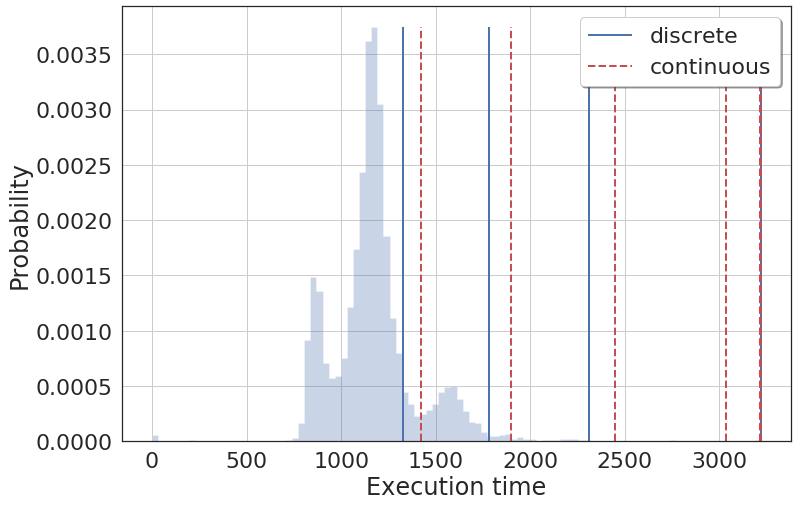

In [21]:
y, x = np.histogram(data, bins=bins, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0

fig, ax = plt.subplots(figsize=(12,8))
sns.set(font_scale=2)
sns.set_style("white")
ax.hist(data, bins=bins, density=True, histtype='stepfilled', alpha=0.3)

ax.vlines(discrete_sequence[0], min(y), max(y), colors='b', lw=2,
          linestyles='solid', label='discrete')
for i in range(1,len(discrete_sequence)):
    ax.vlines(discrete_sequence[i], min(y), max(y), colors='b', lw=2, linestyles='solid')

ax.vlines(sequence[0], min(y), max(y), colors='r', linestyles='dashed', lw=2, label='continuous')
for i in range(1,len(sequence)):
    ax.vlines(sequence[i], min(y), max(y), colors='r', linestyles='dashed', lw=2)
#ax.vlines(max(data), min(y), max(y), colors='k', linestyles='solid')

ax.legend(shadow=True)
plt.grid(True)
ax.set_xlabel('Execution time')
ax.set_ylabel('Probability')
plt.show()